In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd

In [2]:
precipitation = pd.read_pickle('data/pcp_data.pkl')
temperature = pd.read_pickle('data/temp_data.pkl')

In [3]:
# precipitation.describe()

In [4]:
# yearly sum for precipitation

precipitation['year'] = precipitation.index.year

precipitation_yearly = precipitation.groupby('year').sum()
precipitation_yearly

NAME,P73-53,P73-54,P73-55,P73-56,P73-57,P73-58,P73-59,P73-60,P73-61,P73-62,...,P216-291,P216-292,P216-293,P216-294,P216-295,P216-296,P216-297,P216-298,P216-299,P216-300
year,,,,,,,,,,,,,,,,,,,,,
2008,648.73,696.24,701.55,556.06,517.44,432.41,423.40,437.47,469.78,470.02,...,304.20,277.14,279.74,314.20,339.76,364.88,345.84,332.62,280.62,277.95
2009,747.18,626.58,618.91,624.93,648.89,730.88,768.57,755.03,671.10,627.80,...,323.47,364.89,366.56,356.81,342.59,312.88,275.06,239.44,211.76,252.03
2010,1171.13,1026.97,1066.11,985.85,784.94,719.12,781.32,719.42,757.43,745.75,...,479.55,445.12,479.22,467.95,431.78,432.80,403.75,396.42,327.88,309.34
2011,1192.84,1035.23,879.11,558.73,313.69,301.97,240.97,320.68,328.06,344.15,...,344.24,337.83,316.63,308.49,318.57,380.99,378.57,293.01,272.77,258.15
2012,719.83,678.69,567.47,408.98,355.37,283.92,252.25,295.58,327.47,315.49,...,382.84,359.12,372.86,357.75,370.92,374.45,358.09,349.23,406.51,486.68
2013,939.81,842.32,702.34,564.21,475.42,447.03,440.35,384.39,409.40,438.81,...,295.44,323.04,369.43,397.58,345.69,340.21,304.58,238.50,199.43,207.31
2014,546.77,577.14,632.01,645.05,622.33,566.02,609.09,499.57,496.70,477.29,...,340.36,361.27,389.31,396.78,390.60,389.78,390.59,341.41,304.52,307.64
2015,595.87,697.23,824.61,678.75,702.53,691.37,644.45,530.49,419.95,392.24,...,483.59,495.61,552.77,452.72,454.74,464.49,448.83,404.28,540.95,634.38
2016,726.52,708.00,700.79,544.14,398.57,504.23,600.63,637.93,532.28,713.59,...,615.00,570.09,665.72,655.11,640.14,651.02,576.13,602.30,617.41,604.72


In [5]:
# normality test for precipitation

from scipy.stats import shapiro

# for each column
p_values = []
for col in precipitation_yearly.columns:
    _, p = shapiro(np.log(precipitation_yearly[col]))
    p_values.append(p)
    
p_values = np.array(p_values)

np.sum(p_values>0.05)/precipitation.shape[1]

/home/sunyc/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9238092571332568

#### 在0.05显著水平下，无法拒绝90%以上的样本属于对数正态分布，故使用对数正态近似

In [6]:
max_longitude = 135
min_longitude = 73
max_latitude = 54
min_latitude = 18
pcpSummary = pd.read_csv("./CMADS/For-swat-2012/Fork/PCPFORK.txt")
pcpSummary = pcpSummary[(pcpSummary['LONG'] <= max_longitude) & (pcpSummary['LONG'] >= min_longitude) & (pcpSummary['LAT'] <= max_latitude) & (pcpSummary['LAT'] >= min_latitude)]
pcpSummary

,ID,NAME,LAT,LONG,ELEVATION
28852,28853,P73-53,18.03125,73.03125,0
28853,28854,P73-54,18.03125,73.28125,132
28854,28855,P73-55,18.03125,73.53125,345
28855,28856,P73-56,18.03125,73.78125,853
28856,28857,P73-57,18.03125,74.03125,714
...,...,...,...,...,...
86295,86296,P216-296,53.78125,133.78125,771
86296,86297,P216-297,53.78125,134.03125,609
86297,86298,P216-298,53.78125,134.28125,1077
86298,86299,P216-299,53.78125,134.53125,1004


In [7]:
precipitation_yearly.mean().describe()

count    35712.000000
mean       764.343586
std        625.904197
min          6.116667
25%        291.819722
50%        519.345000
75%       1158.519722
max       4810.341111
dtype: float64

In [8]:
pcpSummary["precipitation"] = precipitation_yearly.mean().values
pcpSummary["precipitation_std"] = precipitation_yearly.std().values
pcpSummary["avg_temp"] = temperature.mean().values

pcpSummary

,ID,NAME,LAT,LONG,ELEVATION,precipitation,precipitation_std,avg_temp
28852,28853,P73-53,18.03125,73.03125,0,809.853333,238.229768,27.610065
28853,28854,P73-54,18.03125,73.28125,132,765.377778,166.620915,27.856676
28854,28855,P73-55,18.03125,73.53125,345,743.655556,155.428134,27.263488
28855,28856,P73-56,18.03125,73.78125,853,618.522222,157.785051,23.980835
28856,28857,P73-57,18.03125,74.03125,714,535.464444,163.878061,25.275704
...,...,...,...,...,...,...,...,...
86295,86296,P216-296,53.78125,133.78125,771,412.388889,100.238006,-4.266036
86296,86297,P216-297,53.78125,134.03125,609,386.826667,87.899733,-6.285972
86297,86298,P216-298,53.78125,134.28125,1077,355.245556,109.993665,-7.406639
86298,86299,P216-299,53.78125,134.53125,1004,351.316667,144.163619,-9.473230


In [9]:
temperature

NAME,T73-53,T73-54,T73-55,T73-56,T73-57,T73-58,T73-59,T73-60,T73-61,T73-62,...,T216-291,T216-292,T216-293,T216-294,T216-295,T216-296,T216-297,T216-298,T216-299,T216-300
2008-01-01,24.410,24.680,24.900,21.720,22.780,24.470,25.290,25.965,26.580,26.570,...,-26.580,-25.760,-25.325,-26.090,-26.720,-26.335,-28.060,-28.730,-29.850,-30.665
2008-01-02,23.830,23.415,23.365,20.195,21.270,22.930,23.805,24.580,25.395,25.525,...,-29.205,-28.345,-27.760,-28.360,-28.815,-28.220,-29.765,-30.275,-31.345,-32.125
2008-01-03,24.270,23.805,23.580,20.360,21.395,23.155,24.115,24.955,25.700,25.720,...,-28.865,-27.990,-27.335,-27.880,-28.310,-27.740,-29.315,-29.880,-31.175,-32.180
2008-01-04,24.835,24.665,24.635,21.205,21.995,23.410,24.085,24.615,25.055,24.840,...,-30.540,-29.675,-28.995,-29.520,-29.930,-29.410,-31.045,-31.675,-33.070,-34.180
2008-01-05,25.070,24.600,24.285,20.715,21.405,22.895,23.600,24.205,24.765,24.685,...,-32.205,-31.270,-30.515,-30.950,-31.270,-30.700,-32.275,-32.850,-34.245,-35.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,28.120,28.740,25.735,20.595,22.910,24.790,24.765,24.655,25.660,27.150,...,-29.365,-28.565,-28.465,-29.360,-29.965,-31.375,-33.420,-33.345,-33.080,-28.790
2016-12-28,27.700,28.980,25.195,19.685,22.995,24.925,25.080,25.480,25.555,26.470,...,-27.160,-24.985,-23.565,-25.740,-28.530,-30.105,-32.520,-32.920,-35.125,-31.055
2016-12-29,27.460,29.195,25.060,20.290,23.295,25.020,24.100,24.990,26.470,27.095,...,-26.165,-23.520,-21.910,-24.195,-27.550,-29.450,-31.210,-30.130,-32.295,-27.840
2016-12-30,27.385,29.400,26.355,22.130,23.625,25.125,25.110,26.170,27.105,27.500,...,-22.255,-20.505,-19.625,-21.450,-23.720,-25.660,-27.900,-27.860,-30.530,-27.305


In [10]:
precipitation

NAME,P73-53,P73-54,P73-55,P73-56,P73-57,P73-58,P73-59,P73-60,P73-61,P73-62,...,P216-292,P216-293,P216-294,P216-295,P216-296,P216-297,P216-298,P216-299,P216-300,year
2008-01-01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
2008-01-02,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
2008-01-03,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
2008-01-04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
2008-01-05,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
2016-12-28,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
2016-12-29,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
2016-12-30,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016


### 整体范围内，极端降水与温度的关系

In [11]:
np.array(precipitation.drop(columns=['year']).unstack()).shape

(117421056,)

In [12]:
np.array(temperature.unstack()).shape

(117421056,)

In [13]:
temp = np.array(temperature.unstack())
pcp = np.array(precipitation.drop(columns=['year']).unstack())
data = pd.DataFrame({'temp':temp, 'pcp':pcp})
pcp

array([0.  , 0.18, 0.  , ..., 0.  , 0.  , 0.  ])

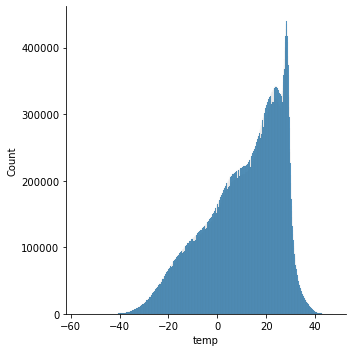

In [14]:
sns.displot(data, x="temp")

In [15]:
def get_extreme_pcp(df, threshold=0.95):
    # print(df)
    # print(df['pcp'].quantile(threshold))
    df = df.sort_values(by='pcp', ascending=False)
    
    
    return df.iloc[:int(df.shape[0]*(1-threshold)), :]

def get_extreme_for_each_temp(df):
    """
    group the data by temperature, step 0.5;
    drop the group with less than 300 samples;
    for each group, get the extreme precipitation for each threshold: 0.9, 0.95, 0.99
    return 3 dataframes for each threshold
    """
    min = df['temp'].min()
    max = df['temp'].max()
    step = 0.5
    groups = []
    for i in np.arange(min, max, step):
        groups.append(df[(df['temp'] >= i) & (df['temp'] < i+step)])
    print(len(groups))
    groups = [group for group in groups if group.shape[0] >= 1000]
    print(len(groups))
    extreme_pcp_90 = []
    extreme_pcp_95 = []
    extreme_pcp_99 = []
    for group in groups:
        # print(group.shape)
        extreme_pcp_90.append(get_extreme_pcp(group, 0.9))
        extreme_pcp_95.append(get_extreme_pcp(group, 0.95))
        extreme_pcp_99.append(get_extreme_pcp(group, 0.99))
        # print(get_extreme_pcp(group, 0.95).shape)
    
    # calculate the average extreme precipitation for each threshold
    avg_extreme_pcp_90 = []
    avg_extreme_pcp_95 = []
    avg_extreme_pcp_99 = []
    for i in range(len(extreme_pcp_90)):
        avg_extreme_pcp_90.append(extreme_pcp_90[i].mean())
        avg_extreme_pcp_95.append(extreme_pcp_95[i].mean())
        avg_extreme_pcp_99.append(extreme_pcp_99[i].mean())
        
    avg_extreme_pcp_90 = pd.concat(avg_extreme_pcp_90)
    avg_extreme_pcp_95 = pd.concat(avg_extreme_pcp_95)
    avg_extreme_pcp_99 = pd.concat(avg_extreme_pcp_99)
    # plot the average extreme precipitation for each threshold
    plt.figure(figsize=(12, 8))
    plt.plot(avg_extreme_pcp_90["temp"], avg_extreme_pcp_90['pcp'], label='90%')
    plt.plot(avg_extreme_pcp_95["temp"], avg_extreme_pcp_95['pcp'], label='95%')
    plt.plot(avg_extreme_pcp_99["temp"], avg_extreme_pcp_99['pcp'], label='99%')
    
    extreme_pcp_90 = pd.concat(extreme_pcp_90)
    extreme_pcp_95 = pd.concat(extreme_pcp_95)
    extreme_pcp_99 = pd.concat(extreme_pcp_99)
    return extreme_pcp_90, extreme_pcp_95, extreme_pcp_99


extreme_pcp_90, extreme_pcp_95, extreme_pcp_99 = get_extreme_for_each_temp(data)
    

208
173


: 

In [ ]:
extreme_pcp_90[:100]

,temp,pcp
104640264,-42.100,2.06
69583599,-42.455,0.00
115468717,-42.120,0.00
115521324,-42.450,0.00
115521318,-42.040,0.00
...,...,...
115758435,-42.025,0.00
115758432,-42.265,0.00
115756576,-42.100,0.00
115756236,-42.395,0.00


In [ ]:
extreme_pcp_99

,temp,pcp
104640264,-42.100,2.06
69583599,-42.455,0.00
115468717,-42.120,0.00
115521324,-42.450,0.00
115521318,-42.040,0.00
115518034,-42.010,0.00
115472004,-42.150,0.00
115472003,-42.280,0.00
115334987,-42.160,0.00
115527900,-42.080,0.00


In [ ]:
# linear regression use statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("pcp ~ temp", data=extreme_pcp_90).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    pcp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2238
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.637
Time:                        11:58:23   Log-Likelihood:                 166.67
No. Observations:                 260   AIC:                            -329.3
Df Residuals:                     258   BIC:                            -322.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5508      1.181     -0.466      0.6

In [ ]:
extreme_pcp_99.mean()

temp   -41.9794
pcp      0.0824
dtype: float64

In [ ]:
data.sort_values(by=['temp'])

,temp,pcp
117372095,-56.500,0.0
117372096,-55.650,0.0
117375383,-54.535,0.0
117373558,-54.495,0.0
117373559,-54.410,0.0
...,...,...
22952955,46.815,0.0
22949668,46.820,0.0
35154725,46.885,0.0
22946379,47.015,0.0


In [3]:
import numpy as np
a = np.array([[3673333.33,5880000],[5880000,15253333.3]])

np.linalg.eig(a)

(array([ 1211151.79577128, 17715514.83422872]),
 array([[-0.92239705, -0.38624303],
        [ 0.38624303, -0.92239705]]))

([<matplotlib.axis.XTick at 0x7f32df305190>,
 [Text(0, 0, '5'),
  Text(1, 0, '2.5'),
  Text(2, 0, '1.25'),
  Text(3, 0, '0.63'),
  Text(4, 0, '0.315'),
  Text(5, 0, '0.16')])

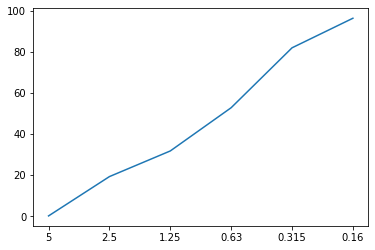

In [9]:
import matplotlib.pyplot as plt
x = np.array([0, 19.15, 31.64, 52.70 ,81.87, 96.27])
plt.plot(x)
plt.xticks(np.arange(6), (5,2.5,1.25,0.63,0.315,0.16))